In [ ]:
# GTEx Blood Sample Exploration Notebook

In [ ]:
## Cell 1: Import Libraries and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import requests
import os

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
## Cell 2: Download GTEx Metadata Files

In [2]:
# Define file URLs (update these with actual GTEx portal URLs)
base_url = "https://storage.googleapis.com/adult-gtex/annotations/"

files_to_download = {
    'sample_attributes': 'GTEx_Analysis_v10_Annotations_SampleAttributesDS.txt',
    'sample_dictionary': 'GTEx_Analysis_v10_Annotations_SampleAttributesDD.xlsx'
}

# Create data directory
os.makedirs('data/gtex_metadata', exist_ok=True)

# Download files
for file_key, filename in files_to_download.items():
    local_path = f'data/gtex_metadata/{filename}'

    if not os.path.exists(local_path):
        print(f"Downloading {filename}...")
        # You'll need to manually download these from GTEx portal
        print(f"Please download {filename} from GTEx portal to {local_path}")
    else:
        print(f"✓ {filename} already exists")

print("\nManual download required:")
print("1. Go to https://gtexportal.org/home/datasets")
print("2. Download GTEx_Analysis_v10_Annotations_SampleAttributesDS.txt")
print("3. Download GTEx_Analysis_v10_Annotations_SampleAttributesDD.xlsx")
print("4. Place them in data/gtex_metadata/ folder")

Please download GTEx_Analysis_v10_Annotations_SampleAttributesDS.txt from GTEx portal to data/gtex_metadata/GTEx_Analysis_v10_Annotations_SampleAttributesDS.txt
Please download GTEx_Analysis_v10_Annotations_SampleAttributesDD.xlsx from GTEx portal to data/gtex_metadata/GTEx_Analysis_v10_Annotations_SampleAttributesDD.xlsx

Manual download required:
1. Go to https://gtexportal.org/home/datasets
2. Download GTEx_Analysis_v10_Annotations_SampleAttributesDS.txt
3. Download GTEx_Analysis_v10_Annotations_SampleAttributesDD.xlsx
4. Place them in data/gtex_metadata/ folder


In [ ]:
## Cell 3: Load and Explore Sample Attributes

In [12]:
# Load the main sample attributes file
try:
    sample_attrs = pd.read_csv('metadata/GTEx_Analysis_v10_Annotations_SampleAttributesDS.txt',
                              sep='\t', low_memory=False)
    print("✓ Sample attributes loaded successfully!")
    print(f"Shape: {sample_attrs.shape}")
    print(f"Columns: {len(sample_attrs.columns)}")

except FileNotFoundError:
    print("❌ Please download the metadata files first (see Cell 2)")
    sample_attrs = None

if sample_attrs is not None:
    # Display basic info
    print("\nFirst few columns:")
    print(sample_attrs.columns[:10].tolist())

    print("\nFirst few rows:")
    display(sample_attrs)

✓ Sample attributes loaded successfully!
Shape: (48231, 119)
Columns: 119

First few columns:
['SAMPID', 'SMATSSCR', 'SMCENTER', 'SMPTHNTS', 'SMRIN', 'SMTS', 'SMTSD', 'SMUBRID', 'SMTSISCH', 'SMTSPAX']

First few rows:


,SAMPID,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMUBRID,SMTSISCH,SMTSPAX,SMNABTCH,SMNABTCHT,SMNABTCHD,SMGEBTCH,SMGEBTCHD,SMGEBTCHT,ANALYTE_TYPE,SMAFRZE,SMGTC,SMRDTTL,SMALTTL,SMALTALG,SMSUPALG,SMRDLGTH,SMVQCFL,SMLMAPQ,SMUMPRD,SMUNPDRD,SMMPPD,SMMAPRT,SMMPPDUN,SMUNMPRT,SMMPDP,SMDPMPRT,SMMPPDXG,SMMPDPXG,SMDPRTXG,SMCHMRD,SMCHMRT,SMMPPDPR,SMMPHQRD,SMMPHQRT,SMMPLQRD,SMSPLTRT,SME1MPRD,SME2MPRD,SME1MPRT,SME2MPRT,SME1MMB,SME2MMB,SME1TTLB,SME2TTLB,SME1MMRT,SME2MMRT,SMTTLMM,SMTTLB,SMBSMMRT,SMESTLBS,SMEXNCRD,SMEXNCRT,SMEXPEFF,SMNTRNRD,SMNTRNRT,SMNTRARD,SMNTRART,SMNTERRD,SMNTERRT,SMAMBRD,SMAMBRT,SMNTEXC,SMDSCRT,SMEXNCRTHQ,SMNTRNRTHQ,SMNTRARTHQ,SMNTERRTHQ,SMAMBRTHQ,SME1SNSE,SME2SNSE,SME1ANTI,SME2ANTI,SME1PCTS,SME2PCTS,SMGNSDTC,SMRRNARD,SMRRNART,SMMFLGTH,SMSFLGTH,SMMDFLGTH,SMSMFLGTH,SMFGCMN,SMFGCSD,SMFGCSK,SMFGCKT,SM3PBMN,SM3PBSD,SM3PBMD,SM3PB25P,SM3PB75P,SM3PBSDM,SM3PBGN,SMMDMNCV,SMMDCVSD,SMMDCVCV,SMEXCVMD,SMEXCVMAD,SMMNCV,SMUVCRD,SMUVCRT,SMSHRTRD,SMSHRTRT,SMSMRDHQ,SMSMRTHQ,SMPRERDHQ,SMPRERTHQ,SMSMGNDT,SMPREGNDT,SMRDLNMN,SMRDLNMD,SMRDLNSD
0,BMS-X4LF-0126-SM-4JBHL,NaN,B1,NaN,7.5,Thyroid,Thyroid,UBERON:0002046,NaN,NaN,BP-30997,RNA isolation from PAXgene-preserved tissue,9/11/12,LCSET-3561,NaN,TruSeq.v1,RNA:Total RNA,NaN,NaN,84112024.0,96720711.0,12486862.0,121825.0,76.0,6442932.0,17567718.0,78484468.0,0.0,77964267.0,0.993372,58704409.0,0.752966,19259858.0,0.247034,77963783.0,19259840.0,0.247036,314564.0,0.008099,38838198.0,71803988.0,0.920986,6160279.0,0.205125,39063531.0,38900736.0,0.995446,0.991298,6343871.0,8337355.0,2.968828e+09,2.956456e+09,0.002137,0.002820,14681226.0,5.925284e+09,0.002478,65135061.0,62496127.0,0.801600,0.796287,9563522.0,0.122665,72059649.0,0.924265,2053854.0,0.026343,3850764.0,0.049391,77964267.0,0.0,0.816699,0.123560,0.940259,0.019298,0.040443,17264168.0,17244720.0,17242163.0,17110908.0,0.500319,0.501947,24186.0,648263.0,0.008315,195.443,80.7081,174.0,69.6822,0.465953,0.100288,0.387527,0.030124,0.562137,0.287351,0.588235,0.343558,0.803801,0.334836,6040.0,1.606570,1.516380,0.872273,0.254556,0.248864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMS-X4LF-0226-SM-4JBJ3,NaN,B1,NaN,6.9,Blood Vessel,Artery - Pulmonary,NaN,NaN,NaN,BP-36612,RNA isolation from PAXgene-preserved tissue,3/1/13,LCSET-3561,NaN,TruSeq.v1,RNA:Total RNA,NaN,NaN,73152094.0,80487739.0,7210929.0,124716.0,76.0,5412805.0,9930615.0,68237488.0,0.0,67786202.0,0.993387,53633016.0,0.791208,14153186.0,0.208792,67784138.0,14153014.0,0.208795,372387.0,0.011033,33752926.0,64139800.0,0.946207,3646402.0,0.215343,33976260.0,33809942.0,0.995824,0.990949,5458889.0,7365485.0,2.582196e+09,2.569556e+09,0.002114,0.002866,12824374.0,5.151751e+09,0.002489,69131555.0,55727589.0,0.822108,0.816671,7545904.0,0.111319,63273493.0,0.933427,1687246.0,0.024891,2825463.0,0.041682,67786202.0,0.0,0.831281,0.109427,0.940708,0.019125,0.040167,14623527.0,14575716.0,14579167.0,14467041.0,0.500760,0.501871,22203.0,202005.0,0.002980,227.066,86.7644,216.0,83.0256,0.468715,0.113648,0.255344,-0.642231,0.588874,0.291229,0.630357,0.375000,0.839811,0.339439,5444.0,0.965368,1.134940,0.930867,0.273198,0.266545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BMS-X4LF-0326-SM-4JBIR,NaN,B1,NaN,7.4,Muscle,Muscle - Skeletal,UBERON:0011907,NaN,NaN,BP-36612,RNA isolation from PAXgene-preserved tissue,3/1/13,LCSET-3561,NaN,TruSeq.v1,RNA:Total RNA,NaN,NaN,82373932.0,96536855.0,14042341.0,120582.0,76.0,6418007.0,19500408.0,76813016.0,0.0,76291420.0,0.993210,50966281.0,0.668047,25325139.0,0.331953,76290417.0,25325095.0,0.331956,314144.0,0.008267,37997834.0,69733576.0,0.914042,6557844.0,0.257380,38243150.0,38048270.0,0.995747,0.990672,5508035.0,7496048.0,2.906479e+09,2.891669e+09,0.001895,0.002592,13004083.0,5.798148e+09,0.002243,43810230.0,66815773.0,0.875797,0.869850,4680145.0,0.061346,71495918.0,0.937142,1243237.0,0.016296,3552265.0,0.046562,76291420.0,0.0,0.889793,0.061767,0.951560,0.011496,0.036945,16807531.0,16853103.0,16858405.0,16639278.0,0.499244,0.503192,19507.0,799949.0,0.010

In [16]:
## View uniques samples in SAMPID column
if sample_attrs is not None:
    print("\nUnique sample IDs (SAMPID):")
    unique_samples = sample_attrs['SAMPID'].unique()
    print(f"Total unique samples: {len(unique_samples)}")
    for i, sample_id in enumerate(unique_samples):
        print(f"{i+1}. {sample_id}")
else:
    print("❌ Sample attributes not loaded - please check previous cells")


Unique sample IDs (SAMPID):
Total unique samples: 48231
1. BMS-X4LF-0126-SM-4JBHL
2. BMS-X4LF-0226-SM-4JBJ3
3. BMS-X4LF-0326-SM-4JBIR
4. BMS-X4LF-0426-SM-4JBIS
5. BMS-X4LF-0526-SM-4JBHX
6. BMS-X4LF-0626-SM-4JBGY
7. BMS-X4LF-0726-SM-4JBI4
8. BMS-X4LF-0826-SM-4JBIP
9. BMS-X4LF-0926-SM-4JBII
10. BMS-X4LF-1026-SM-4JBI8
11. BMS-X4LF-1126-SM-4JBH8
12. BMS-X4LF-1226-SM-4JBH6
13. BMS-X4LF-1326-SM-4JBJ6
14. BMS-X4LF-1426-SM-4JBJL
15. BMS-X4LF-1526-SM-4JBIT
16. BMS-X4LF-1626-SM-4JBIK
17. BMS-X4LF-1726-SM-4JBH1
18. BMS-X4LF-1826-SM-4JBGZ
19. BMS-X4LF-1926-SM-4JBHA
20. BMS-X4LF-2126-SM-4JBIU
21. BMS-X4LF-2226-SM-4JBIX
22. BMS-X4LF-2326-SM-4JBH2
23. BMS-X4LF-2426-SM-4JBHC
24. BMS-X4LF-2626-SM-4JBI6
25. BMS-X4LF-2726-SM-4JBIB
26. BMS-X4LF-2826-SM-4JBIN
27. BMS-X4LF-2926-SM-4JBIV
28. BMS-X4LF-3026-SM-4JBJ5
29. BMS-X4LF-3126-SM-4JBIW
30. BMS-X4LF-3226-SM-4JBJF
31. BMS-X4LF-3326-SM-4JBJI
32. BMS-X4LF-3426-SM-4JBHU
33. BMS-X4LF-3526-SM-4JBHW
34. BMS-X4LF-3826-SM-4JBHP
35. BMS-X4LF-3926-SM-4JBHY
36. BMS

In [ ]:
## Cell 4: Analyze Tissue Types and Sample Sources

In [11]:
if sample_attrs is not None:
    # Key columns to explore
    tissue_cols = ['SMTS', 'SMTSD']  # Tissue type columns

    print("=== TISSUE TYPE ANALYSIS ===")

    # Primary tissue types
    if 'SMTS' in sample_attrs.columns:
        print("\n1. Primary Tissue Types (SMTS):")
        tissue_counts = sample_attrs['SMTS'].value_counts()
        print(tissue_counts)

        # Look for blood-related tissues
        blood_tissues = tissue_counts[tissue_counts.index.str.contains('Blood|blood', case=False, na=False)]
        print(f"\n🩸 Blood-related tissues found: {len(blood_tissues)}")
        if len(blood_tissues) > 0:
            print(blood_tissues)

    # Detailed tissue types
    if 'SMTSD' in sample_attrs.columns:
        print("\n2. Detailed Tissue Types (SMTSD):")
        detailed_tissues = sample_attrs['SMTSD'].value_counts()

        # Look for blood/immune related tissues
        blood_keywords = ['Blood', 'blood', 'Whole', 'whole', 'Cells', 'cells', 'immune', 'lymph']
        blood_related = detailed_tissues[detailed_tissues.index.str.contains('|'.join(blood_keywords), case=False, na=False)]

        print(f"\n🩸 Blood-related detailed tissues ({len(blood_related)}):")
        for tissue, count in blood_related.items():
            print(f"  {tissue}: {count} samples")

        # Show top 20 tissues overall
        print(f"\n📊 Top 20 tissue types:")
        print(detailed_tissues.head)

=== TISSUE TYPE ANALYSIS ===

1. Primary Tissue Types (SMTS):
SMTS
Brain              8035
Blood              4717
Skin               4469
Esophagus          3394
Blood Vessel       3286
Adipose Tissue     2461
Muscle             2352
Heart              2138
Colon              2085
Thyroid            2033
Lung               1892
Nerve              1285
Breast              992
Pancreas            961
Testis              950
Stomach             950
Prostate            745
Adrenal Gland       733
Pituitary           672
Liver               598
Ovary               581
Spleen              570
Small Intestine     432
Salivary Gland      389
Uterus              352
Vagina              348
Kidney              318
Bone Marrow         217
Bladder             134
Cervix Uteri         88
Fallopian Tube       54
Name: count, dtype: int64

🩸 Blood-related tissues found: 2
SMTS
Blood           4717
Blood Vessel    3286
Name: count, dtype: int64

2. Detailed Tissue Types (SMTSD):

🩸 Blood-related deta

In [ ]:
## Cell 5: Focus on Blood Samples

In [5]:
if sample_attrs is not None:
    # Filter for blood samples
    blood_samples = sample_attrs[
        sample_attrs['SMTS'].str.contains('Blood', case=False, na=False) |
        sample_attrs['SMTSD'].str.contains('Blood|Whole Blood', case=False, na=False)
    ].copy()

    print(f"🩸 BLOOD SAMPLES FOUND: {len(blood_samples)}")

    if len(blood_samples) > 0:
        print("\nBlood sample breakdown:")
        print(blood_samples['SMTSD'].value_counts())

        # Check sample quality metrics
        quality_cols = ['SMRIN', 'SMTSISCH', 'SMCENTER']  # RIN, ischemic time, center

        print("\n=== QUALITY METRICS ===")
        for col in quality_cols:
            if col in blood_samples.columns:
                print(f"\n{col} statistics:")
                print(blood_samples[col].describe())

        # Save blood sample IDs
        blood_sample_ids = blood_samples.index.tolist()

        # Save to file for later use
        with open('data/gtex_blood_sample_ids.txt', 'w') as f:
            for sample_id in blood_sample_ids:
                f.write(f"{sample_id}\n")

        print(f"\n✓ {len(blood_sample_ids)} blood sample IDs saved to 'data/gtex_blood_sample_ids.txt'")

        # Display first 10 sample IDs
        print("\nFirst 10 blood sample IDs:")
        for i, sample_id in enumerate(blood_sample_ids[:10]):
            print(f"  {i+1}. {sample_id}")

    else:
        print("❌ No blood samples found in GTEx data")
        print("Available tissue types:")
        print(sample_attrs['SMTS'].value_counts().head(10))

🩸 BLOOD SAMPLES FOUND: 8003

Blood sample breakdown:
SMTSD
Whole Blood                            4369
Artery - Tibial                        1353
Artery - Aorta                         1207
Cells - EBV-transformed lymphocytes     586
Artery - Coronary                       478
Artery - Pulmonary                       10
Name: count, dtype: int64

=== QUALITY METRICS ===

SMRIN statistics:
count    5523.000000
mean        7.714793
std         1.210415
min         2.300000
25%         6.900000
50%         7.700000
75%         8.500000
max        10.000000
Name: SMRIN, dtype: float64

SMTSISCH statistics:
count    7592.000000
mean      392.146733
std       468.161672
min     -1287.000000
25%       -45.250000
50%       364.000000
75%       732.000000
max      2076.000000
Name: SMTSISCH, dtype: float64

SMCENTER statistics:
count     8003
unique       3
top         B1
freq      5637
Name: SMCENTER, dtype: object

✓ 8003 blood sample IDs saved to 'data/gtex_blood_sample_ids.txt'

First 10 b

In [ ]:
## Cell 6: Alternative Tissue Exploration

In [6]:

if sample_attrs is not None:
    print("=== ALTERNATIVE BLOOD-COMPATIBLE TISSUES ===")

    # Look for other potentially compatible tissues
    alternative_keywords = [
        'Spleen',  # Immune organ
        'Lymph',   # Lymphatic system
        'Bone',    # Bone marrow (unlikely but worth checking)
        'Marrow',  # Bone marrow
        'immune',  # Any immune-related
        'cell',    # Cell types
        'EBV'      # EBV-transformed lymphocytes (common in GTEx)
    ]

    print("Looking for alternative blood-compatible tissues...")

    for keyword in alternative_keywords:
        matches = sample_attrs[
            sample_attrs['SMTS'].str.contains(keyword, case=False, na=False) |
            sample_attrs['SMTSD'].str.contains(keyword, case=False, na=False)
        ]

        if len(matches) > 0:
            print(f"\n🔍 '{keyword}' matches ({len(matches)} samples):")
            print(matches['SMTSD'].value_counts())

    # Check for any cell line or transformed cell samples
    transformed = sample_attrs[
        sample_attrs['SMTSD'].str.contains('transform|cell line|EBV|lymphocyte', case=False, na=False)
    ]

    if len(transformed) > 0:
        print(f"\n🧬 Transformed/cell line samples ({len(transformed)}):")
        print(transformed['SMTSD'].value_counts())

=== ALTERNATIVE BLOOD-COMPATIBLE TISSUES ===
Looking for alternative blood-compatible tissues...

🔍 'Spleen' matches (570 samples):
SMTSD
Spleen    570
Name: count, dtype: int64

🔍 'Lymph' matches (595 samples):
SMTSD
Cells - EBV-transformed lymphocytes                      586
Small Intestine - Terminal Ileum - Lymphoid Aggregate      9
Name: count, dtype: int64

🔍 'Bone' matches (217 samples):
SMTSD
Cells - Leukemia cell line (CML)    217
Name: count, dtype: int64

🔍 'Marrow' matches (217 samples):
SMTSD
Cells - Leukemia cell line (CML)    217
Name: count, dtype: int64

🔍 'cell' matches (2125 samples):
SMTSD
Cells - Cultured fibroblasts                     1248
Cells - EBV-transformed lymphocytes               586
Cells - Leukemia cell line (CML)                  217
Stomach - Mixed Cell                               34
Colon - Transverse - Mixed Cell                    10
Small Intestine - Terminal Ileum - Mixed Cell      10
Liver - Mixed Cell                                 10
Panc

In [ ]:
## Cell 7: Sample Quality Assessment

=== BLOOD SAMPLE QUALITY ASSESSMENT ===


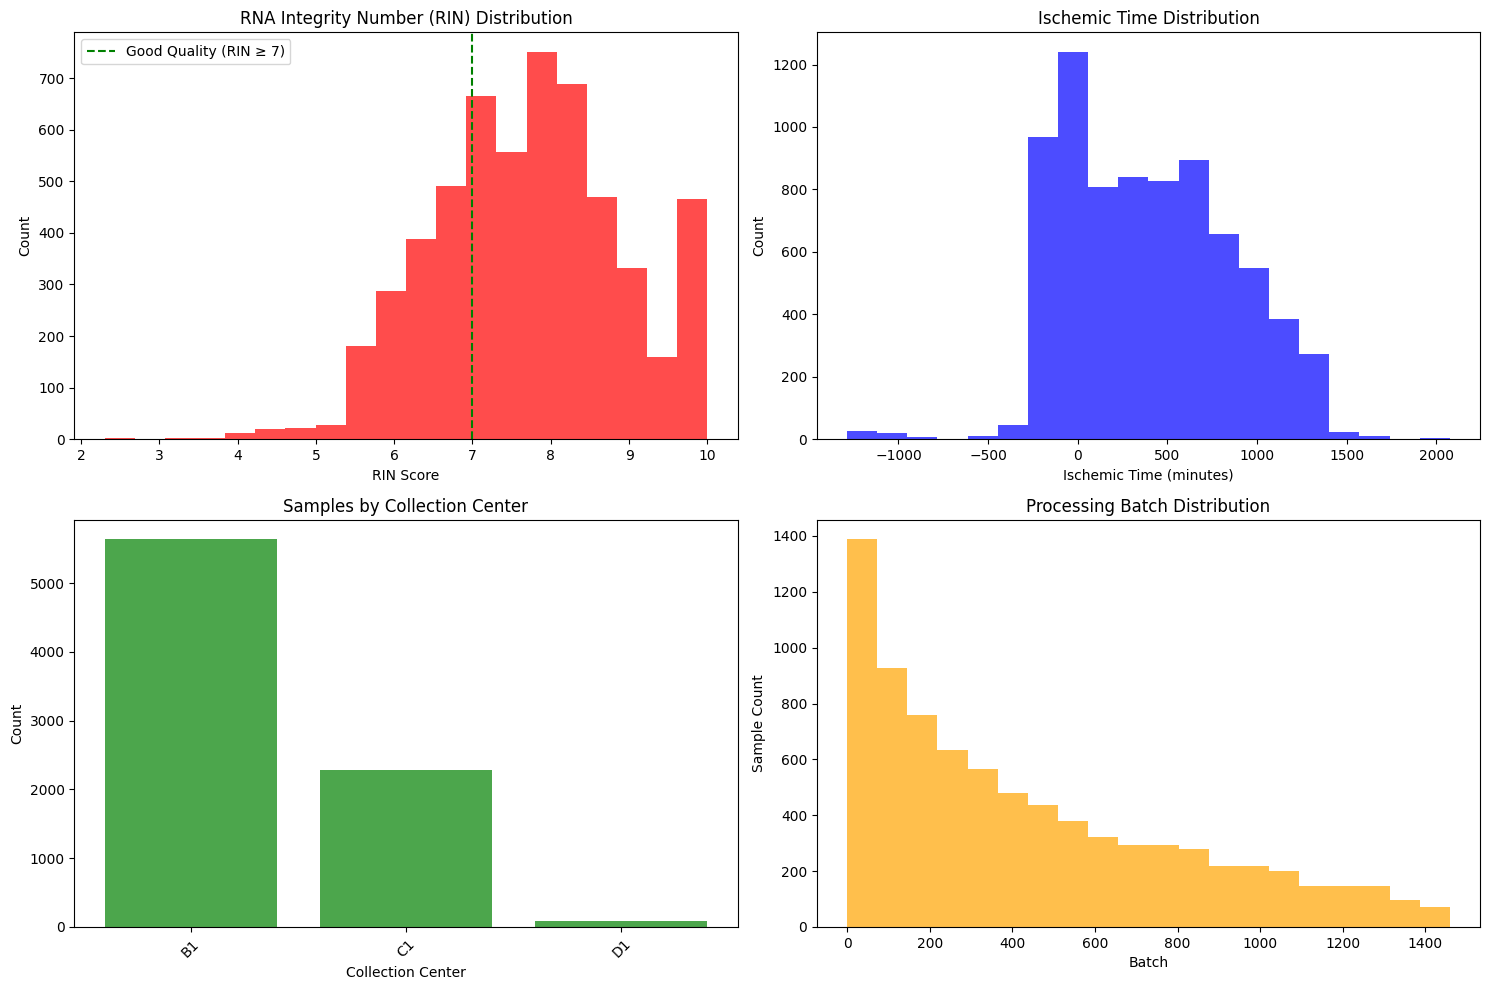


=== QUALITY FILTERING RECOMMENDATIONS ===
Samples with RIN ≥ 7.0: 4087 / 8003 (51.1%)
Samples with ischemic time ≤ 24h: 7568 / 8003 (94.6%)


In [7]:
if sample_attrs is not None and len(blood_samples) > 0:
    print("=== BLOOD SAMPLE QUALITY ASSESSMENT ===")

    # Create quality plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # RIN scores (RNA quality)
    if 'SMRIN' in blood_samples.columns:
        axes[0,0].hist(blood_samples['SMRIN'].dropna(), bins=20, alpha=0.7, color='red')
        axes[0,0].set_title('RNA Integrity Number (RIN) Distribution')
        axes[0,0].set_xlabel('RIN Score')
        axes[0,0].set_ylabel('Count')
        axes[0,0].axvline(7.0, color='green', linestyle='--', label='Good Quality (RIN ≥ 7)')
        axes[0,0].legend()

    # Ischemic time (sample preservation)
    if 'SMTSISCH' in blood_samples.columns:
        ischemic_time = pd.to_numeric(blood_samples['SMTSISCH'], errors='coerce')
        axes[0,1].hist(ischemic_time.dropna(), bins=20, alpha=0.7, color='blue')
        axes[0,1].set_title('Ischemic Time Distribution')
        axes[0,1].set_xlabel('Ischemic Time (minutes)')
        axes[0,1].set_ylabel('Count')

    # Collection center
    if 'SMCENTER' in blood_samples.columns:
        center_counts = blood_samples['SMCENTER'].value_counts()
        axes[1,0].bar(range(len(center_counts)), center_counts.values, color='green', alpha=0.7)
        axes[1,0].set_title('Samples by Collection Center')
        axes[1,0].set_xlabel('Collection Center')
        axes[1,0].set_ylabel('Count')
        axes[1,0].set_xticks(range(len(center_counts)))
        axes[1,0].set_xticklabels(center_counts.index, rotation=45)

    # Sample processing batch
    if 'SMNABTCH' in blood_samples.columns:
        batch_counts = blood_samples['SMNABTCH'].value_counts()
        axes[1,1].hist(range(len(batch_counts)), weights=batch_counts.values,
                       bins=min(20, len(batch_counts)), alpha=0.7, color='orange')
        axes[1,1].set_title('Processing Batch Distribution')
        axes[1,1].set_xlabel('Batch')
        axes[1,1].set_ylabel('Sample Count')

    plt.tight_layout()
    plt.savefig('data/gtex_blood_quality_assessment.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Quality filtering recommendations
    print("\n=== QUALITY FILTERING RECOMMENDATIONS ===")

    if 'SMRIN' in blood_samples.columns:
        high_quality_rin = blood_samples[blood_samples['SMRIN'] >= 7.0]
        print(f"Samples with RIN ≥ 7.0: {len(high_quality_rin)} / {len(blood_samples)} ({len(high_quality_rin)/len(blood_samples)*100:.1f}%)")

    if 'SMTSISCH' in blood_samples.columns:
        ischemic_time = pd.to_numeric(blood_samples['SMTSISCH'], errors='coerce')
        low_ischemic = blood_samples[ischemic_time <= 1440]  # ≤ 24 hours
        print(f"Samples with ischemic time ≤ 24h: {len(low_ischemic)} / {len(blood_samples)} ({len(low_ischemic)/len(blood_samples)*100:.1f}%)")

In [ ]:
## Cell 8: Compatibility Assessment with GDC Data

In [8]:
if sample_attrs is not None and len(blood_samples) > 0:
    print("=== COMPATIBILITY ASSESSMENT ===")

    # Compare with your GDC metadata
    print("GTEx Blood Samples:")
    print(f"  Total count: {len(blood_samples)}")
    print(f"  Tissue types: {blood_samples['SMTSD'].unique()}")

    print("\nYour GDC Unhealthy Samples:")
    print("  Total count: 871 tumor + 871 normal")
    print("  Tissue types: peripheral whole blood, whole bone marrow")

    # Compatibility analysis
    gtex_tissues = set(blood_samples['SMTSD'].str.lower())
    gdc_tissues = {'peripheral whole blood', 'whole bone marrow'}

    compatible_tissues = []
    for gtex_tissue in gtex_tissues:
        for gdc_tissue in gdc_tissues:
            if 'blood' in gtex_tissue and 'blood' in gdc_tissue:
                compatible_tissues.append(gtex_tissue)
                break

    print(f"\n🎯 COMPATIBILITY VERDICT:")
    if len(compatible_tissues) > 0:
        print(f"✅ Found {len(compatible_tissues)} compatible tissue type(s):")
        for tissue in compatible_tissues:
            count = blood_samples[blood_samples['SMTSD'].str.lower() == tissue].shape[0]
            print(f"  - {tissue}: {count} samples")

        total_compatible = sum(blood_samples[blood_samples['SMTSD'].str.lower().isin(compatible_tissues)].shape[0]
                              for tissue in compatible_tissues)
        print(f"\n📊 Total compatible samples: {total_compatible}")

        if total_compatible >= 100:
            print("✅ SUFFICIENT for binary classification!")
        elif total_compatible >= 50:
            print("⚠️  MARGINAL - might work but underpowered")
        else:
            print("❌ INSUFFICIENT - too few samples")
    else:
        print("❌ No directly compatible tissues found")
        print("Recommendation: Use TARGET dataset instead")

=== COMPATIBILITY ASSESSMENT ===
GTEx Blood Samples:
  Total count: 8003
  Tissue types: ['Artery - Pulmonary' 'Artery - Aorta' 'Whole Blood' 'Artery - Tibial'
 'Artery - Coronary' 'Cells - EBV-transformed lymphocytes']

Your GDC Unhealthy Samples:
  Total count: 871 tumor + 871 normal
  Tissue types: peripheral whole blood, whole bone marrow

🎯 COMPATIBILITY VERDICT:
✅ Found 1 compatible tissue type(s):
  - whole blood: 4369 samples

📊 Total compatible samples: 4369
✅ SUFFICIENT for binary classification!


In [ ]:
## Cell 9: Generate Final Recommendations

In [9]:
if sample_attrs is not None:
    print("=== FINAL RECOMMENDATIONS ===")

    if len(blood_samples) > 0:
        compatible_count = len(blood_samples)

        print(f"\n🩸 GTEx Blood Samples Available: {compatible_count}")

        if compatible_count >= 100:
            print("\n✅ RECOMMENDATION: Use GTEx blood samples")
            print("Next steps:")
            print("1. Filter GTEx gene expression data to blood samples only")
            print("2. Use sample IDs from 'data/gtex_blood_sample_ids.txt'")
            print("3. Proceed with your current ML pipeline")
            print("4. Expected result: Realistic AUC (0.7-0.9), not perfect separation")

        elif compatible_count >= 50:
            print("\n⚠️  RECOMMENDATION: GTEx blood samples might work")
            print("Considerations:")
            print("- Sample size is marginal for robust ML")
            print("- Consider combining with TARGET dataset")
            print("- Expect higher variance in results")

        else:
            print("\n❌ RECOMMENDATION: GTEx blood samples insufficient")
            print("Alternative:")
            print("- Apply for TARGET controlled access (436 samples)")
            print("- Much more robust for your research")

    else:
        print("\n❌ RECOMMENDATION: No suitable GTEx samples found")
        print("Best alternatives:")
        print("1. TARGET-AML controlled access (436 blood/bone marrow controls)")
        print("2. Beat AML dataset (21 bone marrow controls)")
        print("3. St. Jude Cloud (tissue-matched controls)")

    print("\n" + "="*50)
    print("SUMMARY:")
    print("- GTEx primarily contains solid tissue samples")
    print("- Blood samples in GTEx are limited")
    print("- TARGET dataset remains your best option")
    print("- Apply for controlled access - it's worth it!")

=== FINAL RECOMMENDATIONS ===

🩸 GTEx Blood Samples Available: 8003

✅ RECOMMENDATION: Use GTEx blood samples
Next steps:
1. Filter GTEx gene expression data to blood samples only
2. Use sample IDs from 'data/gtex_blood_sample_ids.txt'
3. Proceed with your current ML pipeline
4. Expected result: Realistic AUC (0.7-0.9), not perfect separation

SUMMARY:
- GTEx primarily contains solid tissue samples
- Blood samples in GTEx are limited
- TARGET dataset remains your best option
- Apply for controlled access - it's worth it!


In [ ]:
## Cell 10: Export Results and Sample Lists

In [10]:
if sample_attrs is not None and len(blood_samples) > 0:
    print("=== EXPORTING RESULTS ===")

    # Create comprehensive results file
    results = {
        'total_gtex_samples': len(sample_attrs),
        'blood_samples_found': len(blood_samples),
        'blood_sample_ids': blood_samples.index.tolist(),
        'tissue_breakdown': blood_samples['SMTSD'].value_counts().to_dict(),
        'recommendation': 'Use TARGET instead' if len(blood_samples) < 100 else 'GTEx blood samples viable'
    }

    # Save detailed blood sample metadata
    if len(blood_samples) > 0:
        blood_samples.to_csv('data/gtex_blood_samples_metadata.csv')
        print(f"✓ Saved detailed metadata for {len(blood_samples)} blood samples")

    # Save summary report
    with open('data/gtex_exploration_summary.txt', 'w') as f:
        f.write("GTEx Blood Sample Exploration Summary\n")
        f.write("="*40 + "\n\n")
        f.write(f"Total GTEx samples analyzed: {len(sample_attrs)}\n")
        f.write(f"Blood samples identified: {len(blood_samples)}\n\n")

        if len(blood_samples) > 0:
            f.write("Blood sample tissue breakdown:\n")
            for tissue, count in blood_samples['SMTSD'].value_counts().items():
                f.write(f"  {tissue}: {count}\n")

        f.write(f"\nRecommendation: {results['recommendation']}\n")

    print("✓ Saved exploration summary to 'data/gtex_exploration_summary.txt'")
    print("\nFiles created:")
    print("- data/gtex_blood_sample_ids.txt")
    print("- data/gtex_blood_samples_metadata.csv")
    print("- data/gtex_exploration_summary.txt")
    print("- data/gtex_blood_quality_assessment.png")

else:
    print("❌ No results to export - please check metadata files")

=== EXPORTING RESULTS ===
✓ Saved detailed metadata for 8003 blood samples
✓ Saved exploration summary to 'data/gtex_exploration_summary.txt'

Files created:
- data/gtex_blood_sample_ids.txt
- data/gtex_blood_samples_metadata.csv
- data/gtex_exploration_summary.txt
- data/gtex_blood_quality_assessment.png


## Instructions for Use:

1. **Download the metadata files** from GTEx Portal
2. **Run cells 1-2** to set up and download files
3. **Run cells 3-10** to explore blood samples
4. **Check the final recommendations** in cell 9

This notebook will tell you exactly how many blood samples are available in GTEx and whether they're sufficient for your ML analysis!